## Master Thesis - Code examples & results


### 1. [Datasets & Hyperparameters](#DatasetsAndHyperparameters)
### 2. [Functions & Overview](#FunctionsAndOverview)
### 3. [Examples & Application](#ExamplesAndApplication)





Imports

In [2]:
%load_ext nb_black
%matplotlib inline

import pandas as pd
import multiprocessing as mp
import statsmodels.api as sm
import networkx as nx
import pyLDAvis
import warnings

from sklearn.metrics import classification_report
from create_contingency_tables import createContingencyTables
from get_parameters import getParameters

# from run_tests import runTests
from clustering import clustering

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Datasets & Hyperparameters <a class="anchor" id="DatasetsAndHyperparameters"></a>

The datasets can be downloaded [here](https://tinyurl.com/banandit-thesis-datasets). 
I suggest to save them in a separate directory for which you can insert the path in DATASETS_PATH

In [3]:
# hyper-parameters and main dataset

# path datasets
DATASETS_PATH = "/home/jonas/Documents/GitHub/MasterThesis/datasets/finalDataset"

# path results
RESULTS_PATH = "/home/jonas/Documents/GitHub/MasterThesis/results/"

# corpus names (of finalDataset)
CORPORA = [
    "RM_2011_news_CNN.sqlite",
    "RM_2011_news_CTB.sqlite",
    "RM_2011_news_FXN.sqlite",
    "RM_2011_news_HFP.sqlite",
    "RM_2011_news_NBC.sqlite",
    "RM_2011_news_NYT.sqlite",
    "RM_2011_news_RET.sqlite",
    "RM_2011_news_WPO.sqlite",
    "RM_2011_news_WSJ.sqlite",
]

<IPython.core.display.Javascript object>

In [ ]:
# hyper-parameters and calibration dataset

# path datasets
DATASETS_PATH = "/home/jonas/Documents/GitHub/MasterThesis/datasets/calibrationDataset"

# path results
RESULTS_PATH = "/home/jonas/Documents/GitHub/MasterThesis/results/"

# corpus names (of calibrationDataset)
CORPORA = [
    "RM_2012_news_HFP.sqlite",
    "RM_2012_news_NYT.sqlite",
    "RM_2012_news_CNN.sqlite",
    "RM_2012_news_RET.sqlite",
    "RM_2012_news_FXN.sqlite",
    "RM_2012_news_WSJ.sqlite",
]

### Functions & Overview <a class="anchor" id="FunctionsAndOverview"></a>

Here the handling of the basic fucntions is explained


creating contingency tables

In [ ]:
from create_contingency_tables import createContingencyTables

# initialize handler 
contingency_handler = createContingencyTables(DATASETS_PATH, CORPORA)

# function, that calculates a contingency table of a number of [N](int) co-occurring entities for a 
# [REFERENCE_ENTITY](str)

cont_tab = contingency_handler.build_contingency_table_from_single_topic(REFERENCE_ENTITY, N)


# function, that calculates a contingncy table of a preset list of [COOCC]urrence tuples (list) 
# for the model [MODEL](str)

cont_tab = contingency_handler.build_contingency_table_from_preset_cooccurrences(MODEL, COOCCS)

# handler for function multiple topics (arguments: list of entities, number of co-occurrences)
# function, that calculates a contingncy table of a number of [N](int) co-occurring entities 
# for a preset [ENTITY_LIST](list)  

cont_tab = contingency_handler.build_contingency_table_from_topic_list(ENTITY_LIST, N)


extracting entities based on classic NLP

In [ ]:
from get_parameters import getParameters

# initialize handler for single corpus
param_handler = getParameters(DATASETS_PATH, CORPORA[0])

# functio, that creates a tf-idf table over the whole dictionary, used in the corpus
df_tf_idf = param_handler.create_tf_idf_table()

# function, that runs LDA on the selected corpus to extract [N](int) topics
# can be visualized with LDAvis or printed 
lda, corpus, dictionary = param_handler.LDA(N)

# visualize
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary, mds="mmds")
pyLDAvis.display(vis)

# print
lda.show_topics(num_topics=5, num_words=10)

calculating the behavior of the chi-statistics over different reference entities and number of co-occurring entities 

In [ ]:
# for number of entities 
from run_tests import runTests
# initialize the handler to estimate an optimal [N]=number of co-occurring entities (int)
handler = runTests(DATASETS_PATH, CORPORA, REFERENCE_ENTITY, N)

# Init multiprocessing.Pool()
pool = mp.Pool(mp.cpu_count())

# create a df that pictures the behavior of the chi-statistics for the corpus-pairings in [CORPUS_PAIR](list)
# over the top [N](cf. handler) co-occurring entities
df = pd.concat(pool.map(handler.estimate_n, [single_tuple for single_tuple in CORPUS_PAIR]), axis=1)

# close pool
pool.close()

In [ ]:
# for reference entities
from run_tests import runTests
# initialize the handler to estimate a feasible reference entity with [N]=number of co-occurring entities
handler = runTests(DATASETS_PATH, CORPORA, N)

# Init multiprocessing.Pool()
pool = mp.Pool(mp.cpu_count())

# create a df that pictures the behavior of the chi-statistics for all entitis witin an [ENTITIY_LIST](list)
# over all CORPORA
df = pd.concat(pool.map(handler.estimate_optimal_reference_entity, [entity for entity in ENTITY_LIST]), axis=1)
# close pool
pool.close()

clustering the corpora based on their chi-statistics

In [ ]:
# clustering 
from clustering import clustering 

# clusters the df of [hello_kitty_action_plan](func) after the [METRIC](str) 
# "geometric", "arithmetic", "argmax", "argmin" prints out clusters for different thresholds
clustering(df, METRIC)

### Examples & Application <a class="anchor" id="ExamplesAndApplication"></a>

This section is based on the methodology used in my thesis.
I ran four approaches of extracting entities for co-occurrences.
All results I used in my thesis can be loaded and retraced

[**TF-IFD**](#tfidf)

[**LDA**](#lda)

[**Reference Entity**](#ref)

[**Manual Selection**](#man)

[**Processing the entities**](#proc)

[**Clustering**](#clu)


**TF-IDF**<a class="anchor" id="tfidf"></a>    - [return to examples & application](#ExamplesAndApplication)

In [ ]:
# extract tf_idfs for all corpora
tf_idfs = []

for corpus in CORPORA:
    param_handler = getParameters(DATASETS_PATH, corpus)
    df = param_handler.create_tf_idf_table()
    tf_idfs.append(df)

# print top 10 entities with highest TF-IDF score
for df in tf_idfs:
    for i in df.iterrows():
        print(i[1].sort_values(ascending=False)[:5])


In [ ]:
top_terms = [
    "deregulation",
    "latching",
    "katalin",
    "ﬂedged",
    "plumper",
    "plundered",
    "larders",
    "decmberists",
    "omitting",
]

**LDA** <a class="anchor" id="lda"></a> - [return to examples & application](#ExamplesAndApplication)

In [ ]:
# extract N topics for all corpora depict them with the top 10 entities
N = 5

for corpus in CORPORA:
    param_handler = getParameters(DATASETS_PATH, corpus)
    lda, corpus, dictionary = param_handler.LDA(N)
    # print
    print(lda.show_topics(num_topics=N, num_words=10))
    lda, corpus, dictionary = None, None, None

"""
# alternative (if Kernel shuts down)
# visualize
param_handler = getParameters(DATASETS_PATH, CORPORA[0])
lda, corpus, dictionary = param_handler.LDA(N)

vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary, mds="mmds")
pyLDAvis.display(vis)

"""

In [ ]:
# for LDA approach - created with LDAvis (lambda=0.4)

top_terms = [
    "people",
    "obama",
    "romney",
    "percent",
    "game",
    "state",
    "president",
    "police",
    "street",
]

**Reference entity** <a class="anchor" id="ref"></a> -  [return to examples & application](#ExamplesAndApplication)

In [ ]:
# for reference entities
N = 8

# initialize the handler to estimate a feasible reference entity with [N]=number of co-occurring entities
handler = runTests(DATASETS_PATH, CORPORA, N)

# Init multiprocessing.Pool()
pool = mp.Pool(mp.cpu_count())

# create a df that pictures the behavior of the chi-statistics for all entitis witin an [ENTITIY_LIST](list)
# over all CORPORA
df = pd.concat(pool.map(handler.estimate_optimal_reference_entity, [entity for entity in ENTITY_LIST]), axis=1)
# close pool
pool.close()

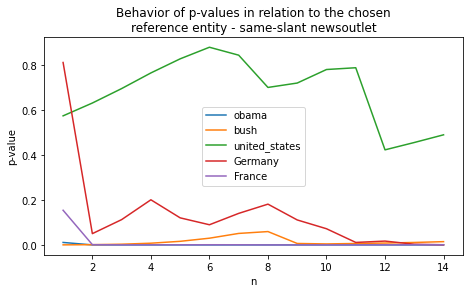

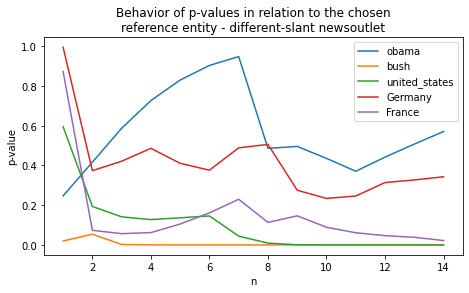

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt

# Import and visualize - same-slant news-outlet
df_same = pd.read_csv(RESULTS_PATH + "refEntity_sameSlant_n31.csv")

df_same.plot(kind="line", figsize=(7.5, 4))
plt.xlabel("n")
plt.ylabel("p-value")
plt.title(
    "Behavior of p-values in relation to the chosen\nreference entity - same-slant newsoutlet"
)
plt.show()

# Import and visualize - diff-slant news-outlet
df_diff = pd.read_csv(RESULTS_PATH + "refEntity_differentSlant_n31.csv")

df_diff.plot(kind="line", figsize=(7.5, 4))
plt.xlabel("n")
plt.ylabel("p-value")
plt.title(
    "Behavior of p-values in relation to the chosen\nreference entity - different-slant newsoutlet"
)
plt.show()

In [ ]:
# for number of entities 
REFERENCE_ENTITY = "obama"
N = 31
# initialize the handler to estimate an optimal [N]=number of co-occurring entities (int)
handler = runTests(DATASETS_PATH, CORPORA, REFERENCE_ENTITY, N)

# Init multiprocessing.Pool()
pool = mp.Pool(mp.cpu_count())

# create a df that pictures the behavior of the chi-statistics for the corpus-pairings in [CORPUS_PAIR](list)
# over the top [N](cf. handler) co-occurring entities
df = pd.concat(pool.map(handler.estimate_n, [single_tuple for single_tuple in CORPUS_PAIR]), axis=1)

# close pool
pool.close()

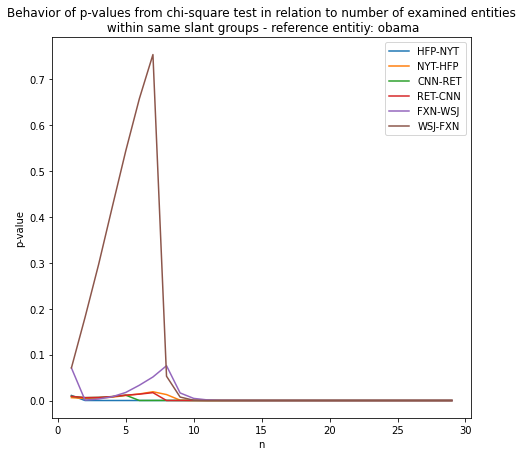

<IPython.core.display.Javascript object>

In [5]:
# import dataset
df_same = pd.read_csv(RESULTS_PATH + "n_sameSlant_refObama.csv")

# Visualze dataset
df_same.plot(kind="line", figsize=(7.5, 7))
plt.ylabel("p-value")
plt.xlabel("n")
plt.title(
    "Behavior of p-values from chi-square test in relation to number of examined entities\n within same slant groups - reference entitiy: obama"
)
plt.legend()
plt.show()



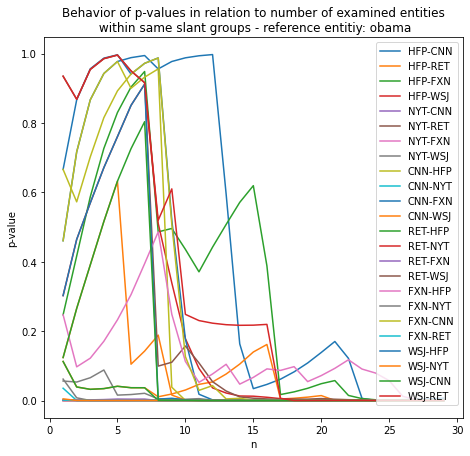

<IPython.core.display.Javascript object>

In [6]:
# import dataset
df_same = pd.read_csv(RESULTS_PATH + "n_differentSlant_refObama.csv")

# Visualze dataset
df_same.plot(kind="line", figsize=(7.5, 7))
plt.ylabel("p-value")
plt.xlabel("n")
plt.title(
    "Behavior of p-values in relation to number of examined entities\n within same slant groups - reference entitiy: obama"
)
plt.legend()
plt.show()

**Manual Selection** <a class="anchor" id="man"></a> - [return to examples & application](#ExamplesAndApplication)

In [ ]:
# first run for manual selection
top_terms = [
    "challenge",
    "obama",
    "romney",
    "dangerous",
    "administration",
    "corruption",
    "china",
    "oil",
    "iran",
]

# second run for manual selection
top_terms = [
    "challenge",
    "obama",
    "romney",
    "dangerous",
    "administration",
    "corruption",
    "illegal",
    "border",
    "fail",
]

**Processing the entities** <a class="anchor" id="proc"></a> - <a class="anchor" id="man"></a> - [return to examples & application](#ExamplesAndApplication)

creating a list of entity tuples for co-occurrences and test them for every constellation of corpus tuples

In [ ]:
# create list of co-occurrence tuples from entity lists
preset_cooccurrences = []
for i in top_terms:
    for j in top_terms:
        if i != j:
            single_tuple = (i, j)
            preset_cooccurrences.append(single_tuple)

In [ ]:
contingency_handler = createContingencyTables(DATASETS_PATH, CORPORA)
raw_cooccurrences = []

# run co-occurrence queries for every corpus 
def hello_kitty_action_plan(model):
    contingency_table = contingency_handler.build_contingency_table_from_preset_cooccurrences(
        model, preset_cooccurrences
    )
    return contingency_table




# open multiprocessing pool
pool = mp.Pool(mp.cpu_count())
# multiprocessing
raw_cooccurrences.append(pool.map(hello_kitty_action_plan, CORPORA))
# close pool
pool.close()

raw_cooccurrences = raw_cooccurrences[0]

# create contingency tables for every possible tuple of corpus and calculate chi-statistic and p_value
df = pd.DataFrame()
for i in range(len(raw_cooccurrences)):
    for j in range(len(raw_cooccurrences)):
        if i != j:
            contingency_table = pd.DataFrame()
            df_results = pd.DataFrame()
            description = (
                raw_cooccurrences[i][0].index[0][-10:-7]
                + "-"
                + raw_cooccurrences[j][0].index[0][-10:-7]
            )
            contingency_table = pd.concat(
                [raw_cooccurrences[i], raw_cooccurrences[j]], axis=0
            )
            contingency_table = sm.stats.Table(contingency_table)

            # calculate results + add them to dataframe
            results = contingency_table.test_nominal_association()

            df_results[description] = [
                raw_cooccurrences[i][0].index[0][-10:-7],
                raw_cooccurrences[j][0].index[0][-10:-7],
                description,
                results.statistic,
                results.pvalue,
            ]

            df_results = df_results.transpose()
            df_results = df_results.rename(
                columns={
                    0: "reference",
                    1: "comparison",
                    2: "combination",
                    3: str("chi_sq"),
                    4: str("p_value"),
                }
            )
            df = pd.concat([df, df_results], axis=0)


# save results to csv
# df.to_csv(RESULTS_PATH + "test.csv", index=False)

In [7]:
# load my results

# FILENAME = "ES_reference_entity_approach.csv"
# FILENAME = "ES_TF_IDF_approach.csv"
# FILENAME = "ES_LDA_approach.csv"
# FILENAME = "ES_manual_selection_approach1.csv"
FILENAME = "ES_manual_selection_approach2.csv"

df = pd.read_csv(RESULTS_PATH + FILENAME)
df.reset_index()
df

reference comparison combination      chi_sq       p_value
0        CNN        CTB     CNN-CTB   24.555975  9.999999e-01
1        CNN        FXN     CNN-FXN   38.564851  9.994083e-01
2        CNN        HFP     CNN-HFP   58.732149  8.505420e-01
3        CNN        NBC     CNN-NBC   31.419846  9.999877e-01
4        CNN        NYT     CNN-NYT    8.445209  1.000000e+00
..       ...        ...         ...         ...           ...
67       WSJ        HFP     WSJ-HFP  156.989262  1.931303e-08
68       WSJ        NBC     WSJ-NBC    3.260501  1.000000e+00
69       WSJ        NYT     WSJ-NYT   51.978582  9.562699e-01
70       WSJ        RET     WSJ-RET  103.033394  7.771292e-03
71       WSJ        WPO     WSJ-WPO  281.601292  0.000000e+00

[72 rows x 5 columns]

<IPython.core.display.Javascript object>

In [8]:
# add labels for evaluating accuracy, precision and recall
liberal = ["NYT", "HFP", "WPO"]
center = ["CNN", "RET", "NBC"]
conservative = ["CTB", "FXN", "WSJ"]

df["same_chi"] = 1
df["same_lit"] = 1


df["reference"] = 1
df["comparison"] = 1
df["ones"] = 1
for i in range(len(df)):
    df.reference[i] = df.combination[i][:3]
    df.comparison[i] = df.combination[i][-3:]


for i in range(len(df)):
    # adding labels, derived from the chi-test
    if df.p_value[i] <= 0.05:
        df.same_chi[i] = 1
    else:
        df.same_chi[i] = 0

    # adding labels, derived from literature
    if all(x in liberal for x in [df.reference[i], df.comparison[i]]) == True:
        df.same_lit[i] = 1
    elif all(x in center for x in [df.reference[i], df.comparison[i]]) == True:
        df.same_lit[i] = 1
    elif all(x in conservative for x in [df.reference[i], df.comparison[i]]) == True:
        df.same_lit[i] = 1
    else:
        df.same_lit[i] = 0

<IPython.core.display.Javascript object>

In [9]:
# split into two dataframes df_same and df_diff
df_same = pd.DataFrame()
df_diff = pd.DataFrame()

for i in range(len(df)):
    if all(x in liberal for x in [df.reference[i], df.comparison[i]]) == True:
        df_same = df_same.append(df.loc[i])
    elif all(x in center for x in [df.reference[i], df.comparison[i]]) == True:
        df_same = df_same.append(df.loc[i])
    elif all(x in conservative for x in [df.reference[i], df.comparison[i]]) == True:
        df_same = df_same.append(df.loc[i])
    else:
        df_diff = df_diff.append(df.loc[i])

df_same = df_same.reset_index()
df_diff = df_diff.reset_index()


# Results for overall precision
y_true = df.same_lit
y_pred = df.same_chi

target_names = ["diff", "same"]
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

        diff     0.7391    0.6296    0.6800        54
        same     0.2308    0.3333    0.2727        18

    accuracy                         0.5556        72
   macro avg     0.4849    0.4815    0.4764        72
weighted avg     0.6120    0.5556    0.5782        72



<IPython.core.display.Javascript object>

**Clustering the corpora** <a class="anchor" id="clu"></a> - [return to examples & application](#ExamplesAndApplication)

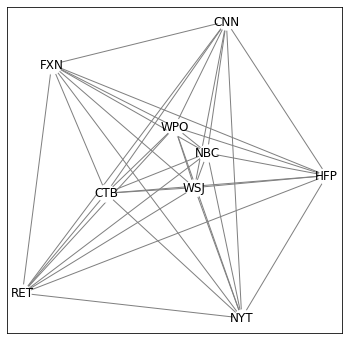

<IPython.core.display.Javascript object>

In [10]:
# Visualize as undirected weighted graph.
# The edge, weights are combined and averaged 

df_new = pd.DataFrame()
G_new = nx.Graph()

for i in range(len(df)):
    k = pd.DataFrame()
    for j in range(len(df)):
        if (
            df.reference[i] == df.comparison[j]
            and df.reference[j] == df.comparison[i]
            and i != j
        ):
            l = [
                str(df.reference[i]),
                str(df.comparison[i]),
                ((df.chi_sq[i] + df.chi_sq[j])),
            ]
                      
            G_new.add_edge(
                str(df.reference[i]),
                str(df.comparison[i]),
                weight=(((df.chi_sq[i]+df.chi_sq[j])/2)*80),
            )
            
            k = k.append(l)
            k = k.transpose()
            df_new = df_new.append(k)

nx.spring_layout(G_new)
plt.figure(figsize=(6, 6))
plt.axis = "off"
nx.draw_networkx(G_new, with_labels=True, edge_color="gray", node_color="white")

df_new = df_new.rename(columns={0: "reference", 1: "comparison", 2: "summed_chi_sq"})


In [11]:
from clustering import clustering

# cluster arguments(df, mode=("geometric", "arithmetic", "argmax", "argmin"))
clustering(df, "geometric")



 threshold 0.5*c_omega
['FXN', 'WPO', 'WSJ']
['NYT', 'WPO', 'WSJ']
['RET', 'WPO', 'WSJ']
['WSJ', 'RET', 'WPO']


 threshold 0.75*c_omega
['WSJ', 'RET', 'WPO']


 threshold 0.8*c_omega
['WSJ', 'RET', 'WPO']


 threshold 0.9*c_omega
['WSJ', 'RET', 'WPO']


<IPython.core.display.Javascript object>